## Notes


using pandas as pd
- variable = pd.read_csv(... ) all data in that file you're reading in become assigned to that variable - in a data frame

In [15]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plots
import seaborn as sns # for nicer plots
import re # regular expressions

# Read the data
toolik_fish = pd.read_csv(
    # Path to the data
    "../data/raw_data/toolik_fish.csv",
    # not a number values are "#N/A"
    na_values="."
    )

In [16]:
toolik_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6726 entries, 0 to 6725
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6726 non-null   object 
 1   Site                  6561 non-null   float64
 2   Lake                  6726 non-null   object 
 3   Fish I.D.             3311 non-null   object 
 4   Species               6603 non-null   object 
 5   Total length (mm)     6551 non-null   float64
 6   FL (mm)               3093 non-null   float64
 7   SL (mm)               765 non-null    float64
 8   Mass (g)              6498 non-null   float64
 9   Sampling              4239 non-null   object 
 10  Otos                  1726 non-null   object 
 11  Stomach               1447 non-null   object 
 12  Sex                   1046 non-null   object 
 13  Mature                862 non-null    object 
 14  Gonads                278 non-null    object 
 15  P1                   

In [17]:
print(toolik_fish.shape)
print(toolik_fish.columns)

(6726, 23)
Index(['Date', 'Site', 'Lake', 'Fish I.D.', 'Species', 'Total length (mm)',
       'FL (mm)', 'SL (mm)', 'Mass (g)', 'Sampling', 'Otos', 'Stomach', 'Sex',
       'Mature', 'Gonads', 'P1', 'Age', 'Total otolith radius', 'DO1..DO52',
       'Fin clip', 'Locality', 'Scales', 'Comments'],
      dtype='object')


In [18]:
def snakecase(s):
        """Convert CamelCase to snake_case and lowercase the string
        s: string
        """
        s = re.sub(
        # Find a lower case letter or number (group 1)
        # followed by an upper case letter (group 2):
        '([a-z0-9])([A-Z])',
        # Replace with - 
        # \1, the lower case letter, 
        # _, an underscore, and
        # \2, the upper case letter:
        r'\1_\2',
        # Perform the search and replace in 
        # the string s:
        s 
        )
        s = re.sub(
                ' ', # Find a space
                '_', # Replace with an underscore
                s    # In the string
                ).lower()  # Convert to lower case
        return s

# print(snakecase("HelloWorld"))

In [19]:
toolik_fish.columns = [
    snakecase(column) for column in toolik_fish.columns
]

toolik_fish.columns

Index(['date', 'site', 'lake', 'fish_i.d.', 'species', 'total_length_(mm)',
       'fl_(mm)', 'sl_(mm)', 'mass_(g)', 'sampling', 'otos', 'stomach', 'sex',
       'mature', 'gonads', 'p1', 'age', 'total_otolith_radius', 'do1..do52',
       'fin_clip', 'locality', 'scales', 'comments'],
      dtype='object')

In [20]:
type(toolik_fish["total_length_(mm)"][0])

numpy.float64

c:\Users\annar\anaconda3\envs\eds217_2023\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

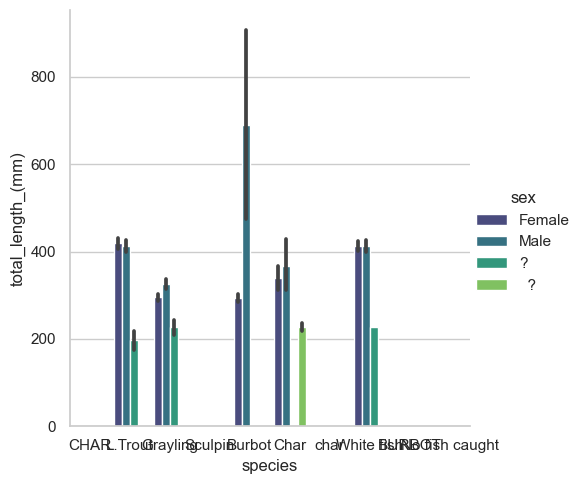

In [23]:
fig = plt.figure(figsize = (10, 6))
sns.set_theme(style="whitegrid")
sns.catplot(data=toolik_fish,
            kind='bar',
              x='species',
              y='total_length_(mm)',
              hue='sex',
              palette="viridis"
              )

plt.show()